<a href="https://colab.research.google.com/github/kimdesok/DeepPATH/blob/master/ImageNet_VGG_ResNet_Inception_Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the necessary packages
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception # TensorFlow ONLY
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import argparse
import cv2

In [11]:
!wget http://images.cocodataset.org/zips/val2017.zip 
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2022-01-23 10:34:36--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.10.35
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.10.35|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  16.1MB/s    in 50s     

2022-01-23 10:35:26 (15.6 MB/s) - ‘val2017.zip’ saved [815585330/815585330]

--2022-01-23 10:35:27--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.202.249
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.202.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  15.9MB/s    in 17s     

2022-0

In [ ]:
!unzip  /content/annotations_trainval2017.zip
!unzip  /content/val2017.zip

In [44]:
# define a dictionary that maps model names to their classes
# inside Keras
MODELS = {
	"vgg16": VGG16,
	"vgg19": VGG19,
	"inception": InceptionV3,
	"xception": Xception, # TensorFlow ONLY
	"resnet": ResNet50
}
# 224×224 input images for VGG!6, VGG!9 and RestNet
# 299x299 input images for Inception V3 and Xception

# initialize the input image shape (224x224 pixels) along with
# the pre-processing function (this might need to be changed
# based on which model we use to classify our image)
#Select a model from the above MODELS dict.
inputModel = 'vgg19'

# path to the image folder
inputPath = '/content/val2017'
inputShape = (224, 224)
preprocess = imagenet_utils.preprocess_input
# if we are using the InceptionV3 or Xception networks, then we
# need to set the input shape to (299x299) [rather than (224x224)]
# and use a different image pre-processing function
if inputModel in ("inception", "xception"):
	inputShape = (299, 299)
	preprocess = preprocess_input
print(inputShape)

# load our the network weights from disk (NOTE: if this is the
# first time you are running this script for a given network, the
# weights will need to be downloaded first -- depending on which
# network you are using, the weights can be 90-575MB, so be
# patient; the weights will be cached and subsequent runs of this
# script will be *much* faster)
print("[INFO] loading {}...".format(inputModel))
Network = MODELS[inputModel]
model = Network(weights="imagenet")

(224, 224)
[INFO] loading vgg19...
574726144/574710816 [==============================] - 16s 0us/step


In [45]:
# load the input image using the Keras helper utility while ensuring
# the image is resized to `inputShape`, the required input dimensions
# for the ImageNet pre-trained network
inputPath = r'/content/val2017/000000000139.jpg'
print("[INFO] loading and pre-processing images from {}...".format(inputPath))
image = load_img(inputPath, target_size=inputShape)
image = img_to_array(image)
print(image.shape)
# our input image is now represented as a NumPy array of shape
# (inputShape[0], inputShape[1], 3) however we need to expand the
# dimension by making the shape (1, inputShape[0], inputShape[1], 3)
# so we can pass it through the network
image = np.expand_dims(image, axis=0)
print(image.shape)
# pre-process the image using the appropriate function based on the
# model that has been loaded (i.e., mean subtraction, scaling, etc.)
image = preprocess(image)
print(image.shape)

[INFO] loading and pre-processing images from /content/val2017/000000000139.jpg...
(224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)


In [46]:
# classify the image
print("[INFO] classifying image with '{}'...".format(inputModel))
preds = model.predict(image)
P = imagenet_utils.decode_predictions(preds)
# loop over the predictions and display the rank-5 predictions +
# probabilities to our terminal
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
	print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

[INFO] classifying image with 'vgg19'...
1. restaurant: 18.16%
2. pool_table: 11.74%
3. microwave: 8.79%
4. home_theater: 5.29%
5. studio_couch: 4.68%


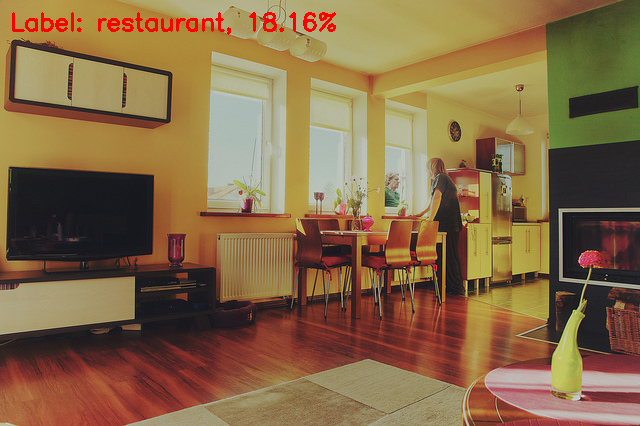

-1

In [47]:
# load the image via OpenCV, draw the top prediction on the image,
# and display the image to our screen

from google.colab.patches import cv2_imshow

orig = cv2.imread(inputPath)
(imagenetID, label, prob) = P[0][0]
cv2.putText(orig, "Label: {}, {:.2f}%".format(label, prob * 100),
	(10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
cv2_imshow(orig)
cv2.waitKey(0)